<a href="https://colab.research.google.com/github/sidhu2690/ai-from-scratch/blob/main/03_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Different Types of GD Methods

In [285]:
m, c = 2.0, 3.0

In [286]:
X = [i for i in range(1, 100)]
Y = [m * i + c for i in X]

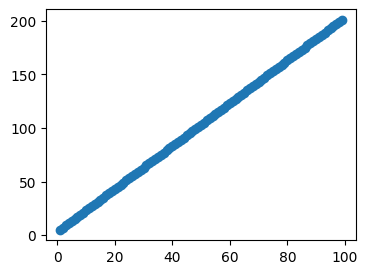

In [287]:
import matplotlib.pyplot as plt

plt.figure(figsize = (4, 3))
plt.scatter(X, Y)
plt.show()

In [288]:
def fx(x, w, b):
  return w*x+b

def gradient_w(w, b, x, y):
  return (fx(x, w, b) - y) * x

def gradient_b(w, b, x, y):
  return (fx(x, w, b) - y)

In [289]:
def gd():
  w, b = 0.0, 0.0
  eta = 0.0001
  epochs = 10000

  n = len(X)

  for epoch in range(epochs):
    dw, db = 0.0, 0.0

    for x, y in zip(X, Y):
      dw += gradient_w(w, b, x, y)
      db += gradient_b(w, b, x, y)

    dw /= n
    db /= n

    w -= eta * dw
    b -= eta * db

  return w, b

In [290]:
w_pred, b_pred = gd()

y_pred = [w_pred * i + b_pred for i in X]

def mse(y_pred, Y):
  n = len(y_pred)
  mse_vals = [(y_pred[i] - Y[i])**2 for i in range(n)]
  return sum(mse_vals) / n

mse(y_pred, Y)

1.3267407224915224

# Momentum GD

In [291]:
def mom_gd():
  w, b = 0.0, 0.0
  vw, vb = 0.0, 0.0
  beta = 0.7
  eta = 0.001
  epochs = 1000

  n = len(X)

  for epoch in range(epochs):
    dw, db = 0.0, 0.0

    for x, y in zip(X, Y):
      dw += gradient_w(w, b, x, y)
      db += gradient_b(w, b, x, y)

    dw /= n
    db /= n

    vw = beta * vw + (1 - beta) * dw
    vb = beta * vb + (1 - beta) * db

    w -= eta * vw
    b -= eta * vb

  return w, b

In [292]:
w_pred, b_pred = mom_gd()

y_pred = [w_pred * i + b_pred for i in X]

def mse(y_pred, Y):
  n = len(y_pred)
  mse_vals = [(y_pred[i] - Y[i])**2 for i in range(n)]
  return sum(mse_vals) / n

mse(y_pred, Y)

1.3278200806101423

# Nesterov Accelerated GD

In [297]:
def NAG():
  w, b = 0.0, 0.0
  eta = 5e-04
  epochs = 10000
  vw, vb = 0.0, 0.0
  beta = 0.1
  n = len(X)

  for epoch in range(epochs):
    db, dw = 0.0, 0.0

    w_look = w - beta * vw
    b_look = b - beta * vb

    for x, y in zip(X, Y):
      dw += gradient_w(w_look, b_look, x, y)
      db += gradient_b(w_look, b_look, x, y)

    dw /= n
    db /= n

    vw = beta * vw + (1 - beta) * dw
    vb = beta * vb + (1 - beta) * db

    w -= eta * vw
    b -= eta * vb

  return w, b

w_pred, b_pred = NAG()

y_pred = [w_pred * i + b_pred for i in X]

def mse(y_pred, Y):
  n = len(y_pred)
  mse_vals = [(y_pred[i] - Y[i])**2 for i in range(n)]
  return sum(mse_vals) / n

mse(y_pred, Y)

0.1851069078254186